In [1]:
import torch as th
from torch import nn
from typing import *


In [2]:
data = ["The cat is sleeping on the mat", "She loves to read books in the evening", "The sun rises in the east and sets in the west", 
        "He bought a new car last week", "They are going to the park to play soccer",
        "The teacher explained the lesson clearly", "I enjoy drinking coffee in the morning",
        "The children laughed at the funny joke", "We visited the museum during our vacation", 
        "The dog barked loudly at the stranger"
]

Analyse data to identify trends and provide insights.
Develop machine learning and NLP models to improve processes.
Create visual reports using tools like Power BI or Tableau.
Present findings to stakeholders in a clear and actionable way.
Collaborate with teams to drive process improvements.
Ensure data accuracy and perform regular checks.
Work with the digital team to integrate new technologies.

# Tokenizer

In [3]:
class Tokenizer:
    def __init__(self):
        self.vocab = None # to store the vocab
        self.input_ids = None # to store the input ids
        
    def get_tokenizer(self, data):
        vocab = set()
        for sentence in data:
            for i in sentence.lower().split(" "):
                vocab.add(i)
        self.vocab = vocab
        return self.vocab
    
    def mapper(self, vocab):
        tokens = {}
        for i, element in enumerate(vocab):
            tokens[element] = i
        self.input_ids = tokens
        return self.input_ids
    
    def __call__(self, data):
        vocab = self.get_tokenizer(data)
        tokens = self.mapper(vocab)
        return tokens
    
    def set_max_len(self, x, max_len):
        current_len = len(x)
        len_diff = max_len - current_len
        
        if len_diff <=  max_len and (len_diff >0):
            for i in range(0, len_diff):
                x.append(0)
            return x
        else:
            return x[0:max_len]
            
    def transform(self, data, tokens, max_len: int):
        _ = []
        for sentence in data:
            x = []
            for word in sentence.lower().split(" "):
                x.append(tokens[word])
            _.append(self.set_max_len(x, max_len = max_len))
        return th.tensor(_)
    
    def __len__(self):
        assert self.vocab != None, "Tokenizer not fit"
        return len(self.vocab)
    


In [4]:
tokenizer = Tokenizer()
tokens = tokenizer(data)
data = tokenizer.transform(data, tokens, 5)


In [5]:
data, data.shape

(tensor([[44,  9, 37, 33, 26],
         [25, 51, 27, 10, 21],
         [44, 12, 32,  3, 44],
         [43, 54, 30, 46,  4],
         [ 5, 40, 28, 27, 44],
         [44, 41,  2, 44, 48],
         [35, 29, 23,  6,  3],
         [44, 53, 17, 24, 44],
         [14, 42, 44,  1, 39],
         [44,  8, 15, 34, 24]]),
 torch.Size([10, 5]))

# Embedding layer


In [6]:
embedding_dim = 50
embedding = nn.Embedding(tokenizer.__len__(), 50)

In [7]:
input_vector = embedding(data)

In [19]:
input_vector

tensor([[[-2.7872e-01, -1.9734e-01, -6.6796e-01,  ...,  1.7722e+00,
          -1.2776e+00, -2.0928e+00],
         [ 5.6329e-01, -9.0955e-04, -2.6341e-01,  ...,  1.9298e+00,
          -5.4771e-01, -5.1380e-01],
         [ 5.5558e-01,  2.1966e-01,  7.9069e-01,  ...,  1.2695e+00,
          -8.4847e-01,  8.4755e-01],
         [-1.7592e-01, -9.6205e-01, -2.4851e-01,  ...,  2.0810e+00,
          -3.1560e-01,  1.0702e-01],
         [ 8.4500e-01,  5.8486e-01, -1.3399e-02,  ..., -4.4313e-01,
           3.5440e-01,  1.6744e+00]],

        [[ 1.4432e+00, -4.3977e-01, -3.1460e-01,  ..., -1.0069e+00,
           1.2206e+00,  1.5133e-01],
         [ 1.1534e-01,  1.1349e+00, -2.3221e+00,  ..., -2.6915e-01,
          -5.0084e-01, -1.1791e+00],
         [-3.1171e-01, -1.6208e+00, -1.4786e+00,  ...,  4.5408e-02,
          -7.1826e-01,  6.5772e-01],
         [-1.5563e+00,  3.9637e-01, -4.3910e-01,  ..., -2.9503e-01,
          -2.8368e-02, -6.2053e-01],
         [-1.5686e+00, -6.1667e-01,  3.4453e-01,  ...

In [9]:
class PositionalEncoding(nn.Module):
    def __init__(self, max_len: int, embedding_dim:int):
        super(PositionalEncoding, self).__init__()
        self.embedding_dim = embedding_dim
        self.max_len = max_len
        
    def get_embedding(self):
        pe = th.zeros(self.max_len, self.embedding_dim)
        index = th.arange(0, self.max_len).unsqueeze(1)
        print(index.shape)
        # for even indices
        pe[:, ::2] = th.sin(index)
        pe[:, 1::2] = th.cos(index)
        return pe
    
pe = PositionalEncoding(5, 50)
positional_embedding = pe.get_embedding()
        
        

torch.Size([5, 1])


In [10]:
positional_embedding.shape

torch.Size([5, 50])

In [11]:
pe = th.zeros(100, 512)
embedding_dim = 512
index = th.arange(0, 100).unsqueeze(1)
den = (th.arange(0, 512, 2)/ th.tensor(10_000**(1/embedding_dim)) + 10e-4)
index.shape
pe[:, ::2] = th.sin(index/den)
pe[:, 1::2] = th.cos(index/den)

In [22]:
embeddings = positional_embedding + input_vector

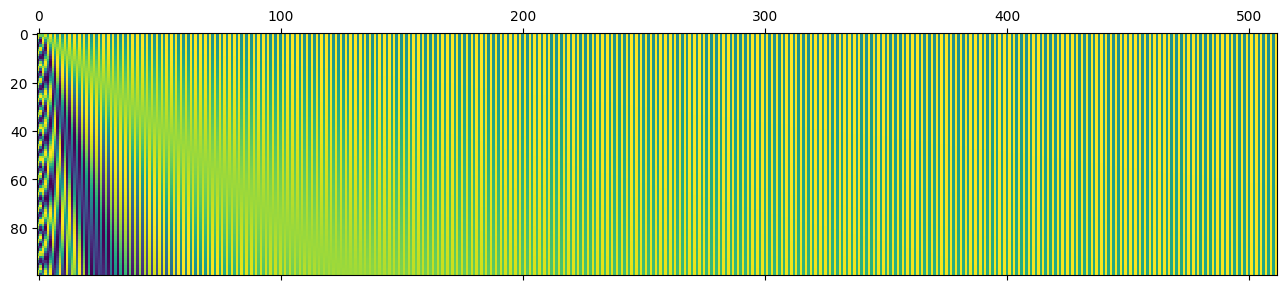

In [14]:
import matplotlib.pyplot as plt
plt.matshow(pe)
plt.show()

In [23]:
class SingleHeadAttention(nn.Module):
    def __init__(self, d_model):
        super(SingleHeadAttention, self).__init__()
        self.d_model = d_model
        self.q = nn.Linear(d_model, d_model)
        self.k = nn.Linear(d_model, d_model)
        self.v = nn.Linear(d_model, d_model)
        
    def forward(self, x):
        query = self.q(x)
        keys = self.k(x)
        value = self.v(x)
        
        # Scaled dot-product attention
        attention_scores = th.matmul(query, keys.transpose(-2, -1))
        attention_scores = attention_scores / th.sqrt(th.tensor(self.d_model, dtype=th.float32))
        attention_weights = th.softmax(attention_scores, dim=-1)
        attention_output = th.matmul(attention_weights, value)
        return attention_output

    
    
class LayerNorm(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.norm = nn.LayerNorm(self.d_model)
        
    def forward(self, x):
        return self.norm(x)
    

class FeedForward(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.f1 = nn.Linear(d_model, d_model)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.f1(x)
        x = self.relu(x)
        return x   
    
        

class EncoderBlock(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.layer_norm = LayerNorm(d_model)
        self.single_head_attention = SingleHeadAttention(self.d_model)
        self.feed_forward = FeedForward(self.d_model)
        
        
    def forward(self, x):
        input = x
        attention_weight  = self.single_head_attention(x)
        # print(input.shape, attention_weight.shape)
        
        # Residual connection
        x = input + attention_weight
        x = self.layer_norm(x)
        
        
        # Feed forward conneciton
        feed_forward = self.feed_forward(x)
            #Residual connecction
        x = x + feed_forward
            # Layer norm
        x = self.layer_norm(x)

        return x
    

class EncoderModule(nn.Module):
    def __init__(self, n:int, d_model):
        super().__init__()
        self.n = n
        self.blocks = nn.ModuleList(EncoderBlock(d_model = d_model) 
                                    for i in range(n))
        
    def forward(self, x):
        for block in self.blocks:
            x = block(x)
        return x

In [25]:
ob = EncoderModule(5, 50)
ob(embeddings).shape

torch.Size([10, 5, 50])